<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Compare Models

### Initializations

In [132]:
# Bibliotheken einbinden
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [134]:
# Importieren der Confusion Matrizen der einzelnen Modelle
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
cm_dict = cm_dict.item()
print(cm_dict)

{'neural_net': {'cm': array([[1830,   17],
       [  55,  498]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1842,    5],
       [  22,  531]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}}


### Calculate Performance Measures for each Model

In [135]:
# Funktion zur Kalkulation der Performance Measures aus einer gegebenen Confusion Matrix
def getPerformanceMeasures(cm):
    tp = cm[0][0]
    fp = cm[1][0]
    fn = cm[0][1]
    tn = cm[1][1]
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*(recall * precision)/(recall + precision)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [136]:
# Kalkulation der Performance Measures für jedes Modell
cms = []
for model, attributes in cm_dict.items():
    label = attributes['label']
    cm = attributes['cm']
    measures = getPerformanceMeasures(cm)
    measures['model'] = label
    cms.append(measures)
df = pd.DataFrame(cms)
df.set_index('model', inplace=True)
df

,accuracy,f1,precision,recall
model,,,,
Neural Network,0.970000,0.980707,0.970822,0.990796
Random Forest,0.988750,0.992724,0.988197,0.997293
Logistic Regression,0.810000,0.883910,0.834214,0.939903
Decision Tree,0.981667,0.988069,0.989680,0.986465
Support Vector Machine,0.847500,0.908546,0.843619,0.984299


### Visualize each Performance Measures of Models

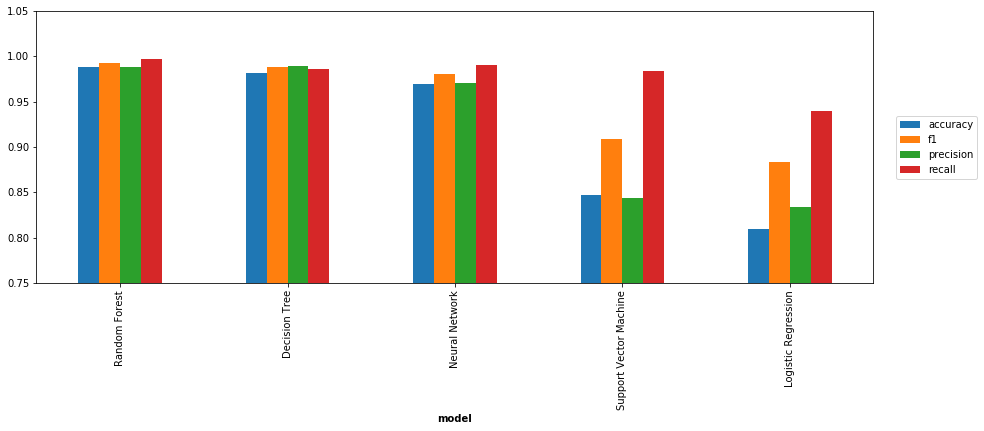

In [137]:
# Barplot der Performance Measures pro Model sortiert nach höchstem f1 Score
df.sort_values('f1', ascending=False).plot.bar(figsize=(15,5), ylim=[0.75, 1.05])
plt.legend(loc='center right', bbox_to_anchor=(1.13,0.5))
plt.xlabel('model', weight='bold');